# Laboratorium - Sympy oraz Numpy

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex=True)
x,y,z = sym.symbols("x y z")

## 1. Sympy
### 1.1. Dany jest wielomian... 
Dany jest wielomian $ -x^{3}+3x^{2}+10x-24 $. Wyrysuj wykres tego wielomianu (od −5 do
5 z krokiem 0.1) i określ punkty przecięcia z osią OX (pierwiastki wielomianu). Oblicz te
pierwiastki, wykorzystując _sympy_. 

Pierwiastki wielomianu: [-3, 2, 4]


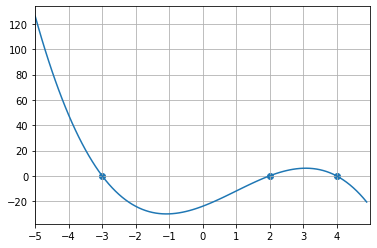

In [54]:
expr = -x**3+3*x**2+10*x-24
x_values = np.arange(-5, 5, 0.1)
y_values = [expr.evalf(subs={x:x_value}) for x_value in x_values]
roots = sym.solve(expr)
    
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set_xlim(-5,5)
ax.set_xticks(np.arange(-5,5,1))
ax.scatter(roots, [0 for i in roots])
ax.grid()
    
print("Pierwiastki wielomianu:", roots)

### 1.2. Rozwiąż układ równań 
Rozwiąż układ równań:
$$
    \begin{align*} 
    x^{2}+3y &=10 \\ 
    4x-y^{2} &= -2
    \end{align*} 
$$

In [55]:
eq1 = sym.Eq(x**2+3*y, 10)
eq2 = sym.Eq(4*x-y**2, -2)
solutions = sym.solve([eq1, eq2])

### 1.3. Ile rozwiązań ma ten układ równań? 

In [56]:
print("Liczba rozwiązań:", len(solutions))

Liczba rozwiązań: 4


### 1.4. Wypisz rozwiązania także w postaci numerycznej

In [57]:
numerical_solutions = [[v.evalf() for k, v in s.items()] for s in solutions]
for i in numerical_solutions: 
    print(i)

[1.35338582359163, 2.72278227083374]
[-3.12273673247333 - 1.62282840726831*I, 0.960695779699584 - 3.37844391858529*I]
[-3.12273673247333 + 1.62282840726831*I, 0.960695779699584 + 3.37844391858529*I]
[4.89208764135504, -4.64417383023290]


### 1.5. Wyznacz pochodną funkcji
Wyznacz pochodną funkcji: 
$$ \frac{\sin(\log_{2}(x)) \cdot \cos(x^{2})}{x}  $$

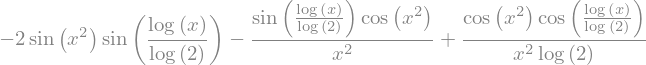

In [58]:
expr = sym.sin(sym.log(x, 2))*sym.cos(x**2)/x
sym.diff(expr)

### 1.6. Przekształć notatnik do strony html
Przekształć notatnik do strony html używając `ipython nbconvert`

In [59]:
import os
cmd = "jupyter nbconvert --to html Numpy_Sympy.ipynb"
os.system(cmd)

[NbConvertApp] Converting notebook Numpy_Sympy.ipynb to html
[NbConvertApp] Writing 647240 bytes to Numpy_Sympy.html


## 2. Numpy
### 2.1. Utwórz macierz 2D
Utwórz macierz 2D:
$$
    \begin{bmatrix}
    1 & 3 & 1 & 2 \\
    1 & 2 & 5 & 8 \\
    3 & 1 & 2 & 9 \\
    5 & 4 & 2 & 1 \\
    \end{bmatrix}
$$

In [60]:
M = np.array([[1,3,1,2],[1,2,5,8],[3,1,2,9],[5,4,2,1]])
M

array([[1, 3, 1, 2],
       [1, 2, 5, 8],
       [3, 1, 2, 9],
       [5, 4, 2, 1]])

### 2.2. Usuń z utworzonej macierzy pierwszy i ostatni wiersz oraz ostatnią kolumnę.

In [61]:
M1 = M[1:-1,:-1]
M1

array([[1, 2, 5],
       [3, 1, 2]])

### 2.3. Utwórz macierz 2D
Utwórz macierz 2D:
$$
    \begin{bmatrix}
    2 & 3 & 1 \\
    5 & 1 & 3 \\
    \end{bmatrix} 
$$

In [62]:
M = np.array([[2,3,1],[5,1,3]])
M

array([[2, 3, 1],
       [5, 1, 3]])

### 2.4. Dokonaj transpozycji powyższej macierzy

In [63]:
M2 = M.T
M2

array([[2, 5],
       [3, 1],
       [1, 3]])

### 2.5. Oblicz iloczyn macierzy z punktu 2 i 4

In [64]:
M1.dot(M2)

array([[13, 22],
       [11, 22]])

### 2.6. Stwórz wykres funkcji _sin_
Stwórz wykres funkcji _sin_ w przedziale od −π do π z krokiem co: π, 2π/10, 2π/100.

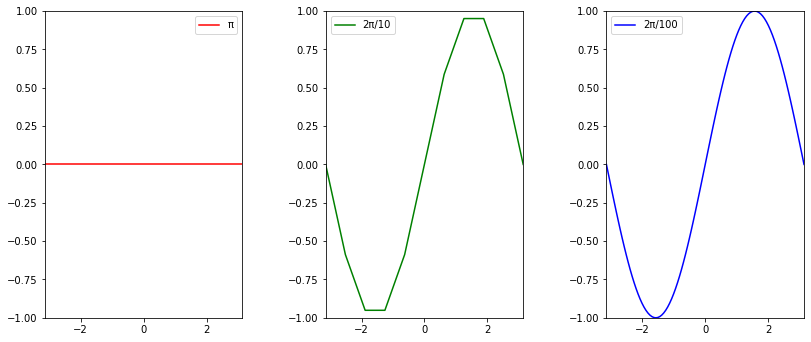

In [65]:
properties = {
    "color" : ("red", "green", "blue"),
    "step" : (np.pi, 2*np.pi/10, 2*np.pi/100),
    "label" : ("π", "2π/10", "2π/100")
}

fig, axs = plt.subplots(1,3)
fig.tight_layout() 
fig.set_size_inches(12, 5)

for i in range(3):
    x_values = np.arange(-np.pi, np.pi + 0.001, properties["step"][i])
    y_values = np.sin(x_values)
    axs[i].plot(x_values, y_values, color=properties["color"][i], label=properties["label"][i])
    axs[i].set_xlim(-np.pi, np.pi)
    axs[i].set_ylim(-1,1)
    axs[i].legend()